# LSTM

In [1]:
with open("./data/next_word_prediction.txt", encoding="utf-8") as f:
    text = f.read()

In [2]:
text[:100]

'Nepal is a landlocked country with highly diverse and rich geography, culture, and religions. It is '

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [4]:
tokenizer = Tokenizer(num_words=1000, oov_token="<UNK>")

In [5]:
tokenizer.fit_on_texts([text])

In [6]:
word2index = tokenizer.word_index

index2word = {v: k for k, v  in word2index.items()}

In [7]:
text_split = text.split(".")

text_split[:10]

['Nepal is a landlocked country with highly diverse and rich geography, culture, and religions',
 ' It is situated in South Asia on the lap of the huge Himalayas surrounded by India in the east, south, and west and China in the north',
 ' It occupies an area of 147,516 sq',
 ' km',
 ' with an average of 193km wide from North to South and an average length (East to West) is 885km',
 ' It provides a variety of geographical structures owning a large number of natural gifts',
 '\n\nGeographically, Nepal is divided into three regions',
 ' The mountain regions, Hilly and Terai regions occupy about 15%, 68%, and 17% of the total area of Nepal respectively',
 ' Nepal owns many snow-capped lofty mountains',
 ' The highest peak in the world, Mt']

In [8]:
text_sequences = list()

for sentence in text.split("."):
    tokenized = tokenizer.texts_to_sequences([sentence])[0]
    text_sequences.append(tokenized)

In [9]:
text_sequences[10]

[30, 120, 121, 3, 48, 122, 123]

In [10]:
decode = lambda x: " ".join([index2word[i] for i in x])

In [11]:
text_sample = "Nepal is a beautiful country"

encoded = tokenizer.texts_to_sequences([text_sample])[0]
print(encoded)
decoded = decode(encoded)
print(decoded)

[5, 7, 6, 1, 22]
nepal is a <UNK> country


In [12]:
sample_data = [[1,2,3],[1,2],[1,2,3,4,5,6,7,8,9,0]]
sample_train_data = list()

for data in sample_data:
    for i in range(1, len(data)):
        input = data[:i+1]
        sample_train_data.append(input)

In [13]:
sample_train_data

[[1, 2],
 [1, 2, 3],
 [1, 2],
 [1, 2],
 [1, 2, 3],
 [1, 2, 3, 4],
 [1, 2, 3, 4, 5],
 [1, 2, 3, 4, 5, 6],
 [1, 2, 3, 4, 5, 6, 7],
 [1, 2, 3, 4, 5, 6, 7, 8],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]]

In [14]:
for seq in sample_train_data:
    sample_data = seq[:-1]
    sample_target = seq[-1]
    
    print(f"Data: {sample_data} -> {sample_target}")

Data: [1] -> 2
Data: [1, 2] -> 3
Data: [1] -> 2
Data: [1] -> 2
Data: [1, 2] -> 3
Data: [1, 2, 3] -> 4
Data: [1, 2, 3, 4] -> 5
Data: [1, 2, 3, 4, 5] -> 6
Data: [1, 2, 3, 4, 5, 6] -> 7
Data: [1, 2, 3, 4, 5, 6, 7] -> 8
Data: [1, 2, 3, 4, 5, 6, 7, 8] -> 9
Data: [1, 2, 3, 4, 5, 6, 7, 8, 9] -> 0


In [15]:
train_sequences = list()

for sequence in text_sequences:
    for i in range(1, len(sequence)):
        train_sequences.append(sequence[:i+1])

In [16]:
train_sequence_features = [seq[:-1] for seq in train_sequences]
train_sequence_labels = [seq[-1] for seq in train_sequences]

In [17]:
for f, t in zip(train_sequence_features[:15], train_sequence_labels[:15]):
    print(f"Data: {f} -> {t}")

Data: [5] -> 7
Data: [5, 7] -> 6
Data: [5, 7, 6] -> 74
Data: [5, 7, 6, 74] -> 22
Data: [5, 7, 6, 74, 22] -> 23
Data: [5, 7, 6, 74, 22, 23] -> 75
Data: [5, 7, 6, 74, 22, 23, 75] -> 76
Data: [5, 7, 6, 74, 22, 23, 75, 76] -> 4
Data: [5, 7, 6, 74, 22, 23, 75, 76, 4] -> 35
Data: [5, 7, 6, 74, 22, 23, 75, 76, 4, 35] -> 77
Data: [5, 7, 6, 74, 22, 23, 75, 76, 4, 35, 77] -> 78
Data: [5, 7, 6, 74, 22, 23, 75, 76, 4, 35, 77, 78] -> 4
Data: [5, 7, 6, 74, 22, 23, 75, 76, 4, 35, 77, 78, 4] -> 79
Data: [9] -> 7
Data: [9, 7] -> 80


In [18]:
max_sequence_length = max([len(seq) for seq in train_sequence_features])

print(max_sequence_length)

30


In [19]:
train_sequence_features[0]

[5]

In [20]:
def pad_sequence(sequence, max_sequence_length):
    """Takes a sequence and return a 0 pre padded sequence of max length sequence"""
    padded_sequence = list()
    zeros_required = max_sequence_length - len(sequence)
    padded_sequence.append([0]*zeros_required + sequence)
    return padded_sequence[0]
    
    
padded_sequence = pad_sequence([1,2,3], 5)

In [21]:
padded_sequence

[0, 0, 1, 2, 3]

In [22]:
padded_train_sequences = [pad_sequence(seq, max_sequence_length) for seq in train_sequence_features]

In [23]:
print(padded_train_sequences[10], train_sequence_labels[10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 7, 6, 74, 22, 23, 75, 76, 4, 35, 77] 78


In [24]:
x_train = tf.constant(padded_train_sequences, dtype=tf.float32)

In [25]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_sequence_labels, num_classes=len(word2index) + 1)

y_train = tf.constant(y_train, dtype=tf.float32)

In [26]:
x_train.shape, y_train.shape # train feature is tokenized sequence of max sequence 30 and label shape output is one hot encoded label of vocab size 283 of our dataset text

(TensorShape([475, 30]), TensorShape([475, 284]))

## Model

In [27]:
# importing

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [28]:
model = Sequential()

model.add(Embedding(input_dim=len(word2index) + 1, output_dim=32, input_length=max_sequence_length))
model.add(LSTM(150))
model.add(Dense(len(word2index) + 1, activation="softmax"))

C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [29]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

vocab_size = len(word2index) + 1

input = Input(shape=(max_sequence_length,))
x = Embedding(input_dim=vocab_size, output_dim=32, input_length=max_sequence_length)(input)
x = LSTM(150)(x)
output = Dense(vocab_size, activation="softmax")(x)

model = Model(inputs=input, outputs=output)

C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [30]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 30, 32)         │         9,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 150)            │       109,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 284)            │        42,884 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,772 (631.92 KB)

 Trainable params: 161,772 (631.92 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [32]:
model_history = model.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0076 - loss: 5.6471
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0406 - loss: 5.5046
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0510 - loss: 5.2578
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0605 - loss: 5.2167
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0260 - loss: 5.2507
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0571 - loss: 5.1840
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0344 - loss: 5.1607
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0578 - loss: 5.1278
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0552 - loss: 5.1135
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0637 - loss: 5.0853
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0798 - loss: 4.9980
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

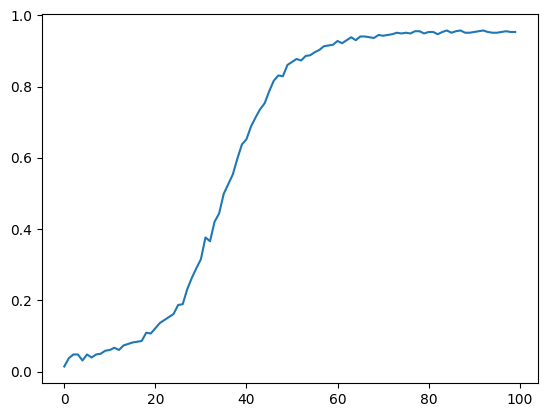

In [33]:
import matplotlib.pyplot as plt

plt.plot(model_history.history["accuracy"])

Text(0.5, 1.0, 'Loss vs Epoch')

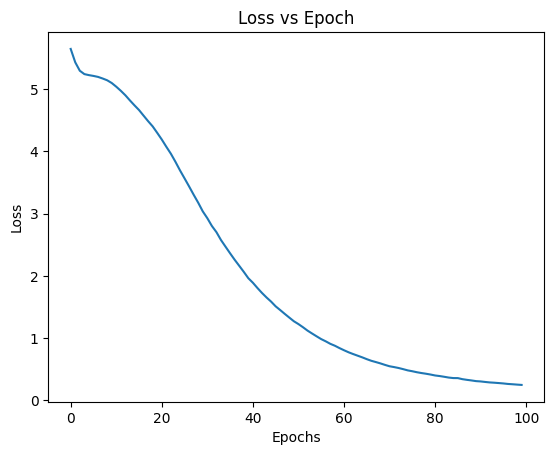

In [35]:
plt.plot(model_history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")

In [51]:
def predict_next_word(text):
    tokenized = tokenizer.texts_to_sequences([text])[0]
    padded = pad_sequence(tokenized, max_sequence_length)
    input = tf.constant([padded], dtype=tf.float32)
    prediction = model.predict(input)
    # print(prediction[0].argmax())
    predicted_word_index = tf.argmax(prediction, axis=1).numpy()[0]
    
    predicted_word = index2word[predicted_word_index]
    print(f"{text} : {predicted_word}")

In [49]:
index2word[74]

'landlocked'

In [52]:
predict_next_word("Nepal is a landlocked")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Nepal is a landlocked : country
